# Fruits and Vegetables Image Recognition Project

# Importing Libraries

In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data preprocessing

##  Training Image Preprocessing 

In [41]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/yashe/OneDrive/Desktop/dataset/train',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=64,
    image_size=(64,64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 9198 files belonging to 36 classes.


## Validation Image Preprocessing

In [42]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'C:/Users/yashe/OneDrive/Desktop/dataset/validation',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 685 files belonging to 36 classes.


# Build the model

In [43]:
 cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [46]:
cnn.add(tf.keras.layers.Flatten())

In [47]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu')) #512 nerons will run on relu activation function

In [48]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu')) #256 nerons will run on relu activation function

In [49]:
cnn.add(tf.keras.layers.Dropout(0.5)) # We are Droping some neurons To avoid overfiting

In [50]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) # output layer

# Compiling & Training Phase 

In [51]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 88s 593ms/step - accuracy: 0.3943 - loss: 10.1622 - val_accuracy: 0.4774 - val_loss: 2.0576
Epoch 2/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 79s 544ms/step - accuracy: 0.7290 - loss: 1.0017 - val_accuracy: 0.6248 - val_loss: 1.4722
Epoch 3/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 77s 534ms/step - accuracy: 0.7856 - loss: 0.7698 - val_accuracy: 0.6774 - val_loss: 1.3340
Epoch 4/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 88s 606ms/step - accuracy: 0.8217 - loss: 0.6325 - val_accuracy: 0.7255 - val_loss: 1.1071
Epoch 5/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 81s 559ms/step - accuracy: 0.8572 - loss: 0.4789 - val_accuracy: 0.7212 - val_loss: 1.2568
Epoch 6/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 569ms/step - accuracy: 0.8931 - loss: 0.3618 - val_accuracy: 0.7504 - val_loss: 1.1550
Epoch 7/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 74s 511ms/step - accuracy: 0.9239 - loss: 0.2630 - val_accuracy: 0.7547 - val_loss: 1.1482
Epoch 8/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 66s 460ms/step - accuracy: 0.9418 - loss: 

# Saving Model

In [54]:
cnn.save('trained_model.h5')

In [55]:
training_history.history #return dictionary of history

{'accuracy': [0.5653402805328369,
  0.7445096969604492,
  0.7851706743240356,
  0.8290932774543762,
  0.8602957129478455,
  0.8958469033241272,
  0.9322679042816162,
  0.9423787593841553,
  0.9550989270210266,
  0.9666231870651245,
  0.9726027250289917,
  0.9702109098434448,
  0.9745596647262573,
  0.974777102470398,
  0.9731463193893433],
 'loss': [3.4296751022338867,
  0.939250648021698,
  0.7591091394424438,
  0.6058014631271362,
  0.4685380756855011,
  0.35032644867897034,
  0.2381211370229721,
  0.19561101496219635,
  0.1543504148721695,
  0.11813263595104218,
  0.10689515620470047,
  0.10021714121103287,
  0.08829838037490845,
  0.08959513157606125,
  0.09702542424201965],
 'val_accuracy': [0.47737225890159607,
  0.6248174905776978,
  0.6773722767829895,
  0.7255474328994751,
  0.7211678624153137,
  0.7503649592399597,
  0.7547445297241211,
  0.7751824855804443,
  0.7620437741279602,
  0.7605839371681213,
  0.7605839371681213,
  0.7722627520561218,
  0.7737226486206055,
  0.74890

In [56]:
# Recording History in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [57]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Calculating accurcy of model achived on validation set

In [58]:
print("Validation Set Accuracy: {} %" .format(training_history.history['val_accuracy'][-1]*100))

Validation Set Accuracy: 75.620436668396 %


In [59]:
print("Training Set Accuracy: {} %" .format(training_history.history['accuracy'][-1]*100))

Training Set Accuracy: 97.31463193893433 %


# Accuracy Visualization

## Training Visualization

In [60]:
training_history.history['accuracy'] # accuracy for training set for rach epochs

[0.5653402805328369,
 0.7445096969604492,
 0.7851706743240356,
 0.8290932774543762,
 0.8602957129478455,
 0.8958469033241272,
 0.9322679042816162,
 0.9423787593841553,
 0.9550989270210266,
 0.9666231870651245,
 0.9726027250289917,
 0.9702109098434448,
 0.9745596647262573,
 0.974777102470398,
 0.9731463193893433]

# Visualization before tune the moel

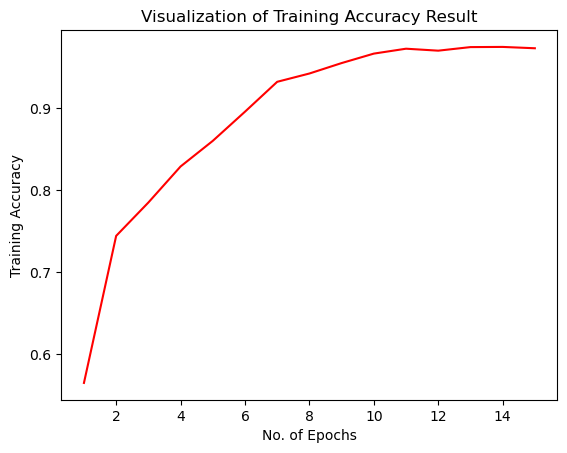

In [72]:
# This is training accuracy visualization of our previous model for underfitted model

epoch = [i for i in range(1,16)]
plt.plot(epoch,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

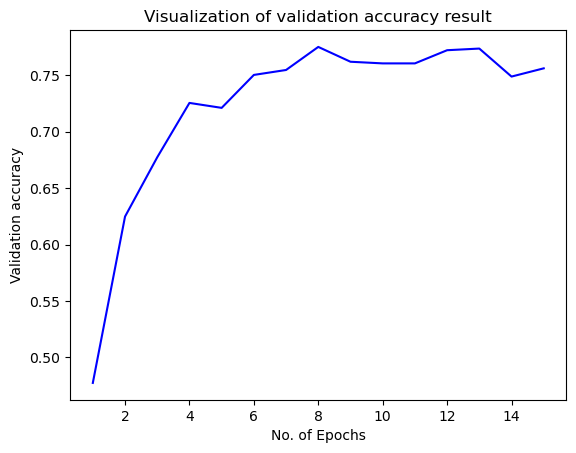

In [73]:
# This is validation accuracy visualization of our previous model for underfitted model

plt.plot(epoch,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation accuracy')
plt.title('Visualization of validation accuracy result')
plt.show()

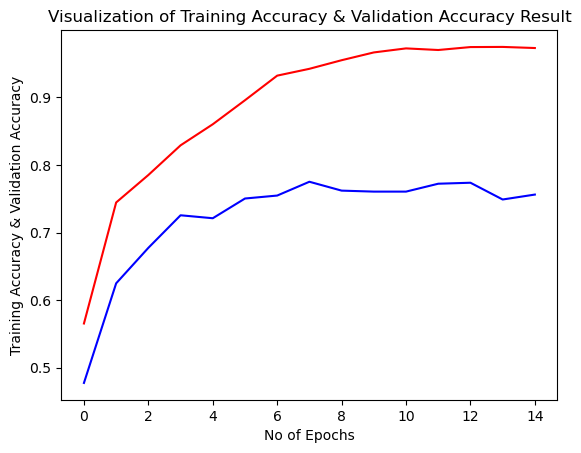

In [74]:
# Visualization of Training accuracy & Validation accuracy Result when model is overfitted

epochs=[i for i in range (1,40)]
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.show()

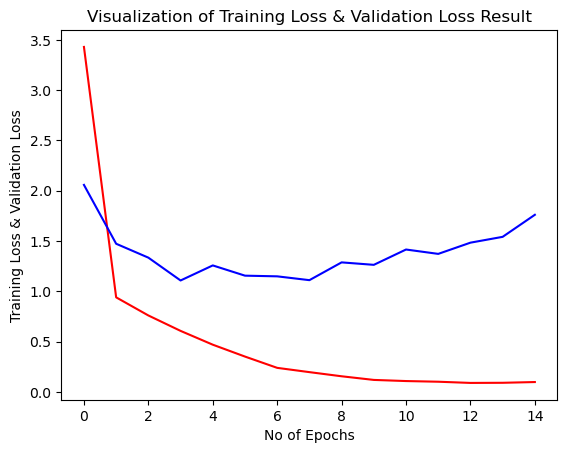

In [75]:
# Visualization of Training Loss & Validation Loss Result when model is overfitted

plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.show()

# Visualization After Tune The Model

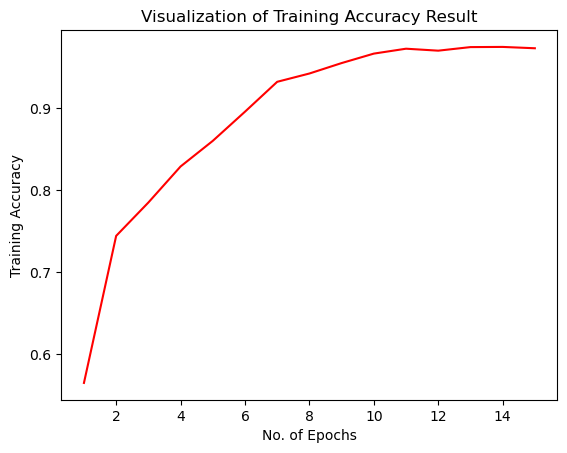

In [76]:
# This is training accuracy visualization of our model after doing correction in model

epoch = [i for i in range(1,16)] # Here we have used 32 epochs
plt.plot(epoch,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

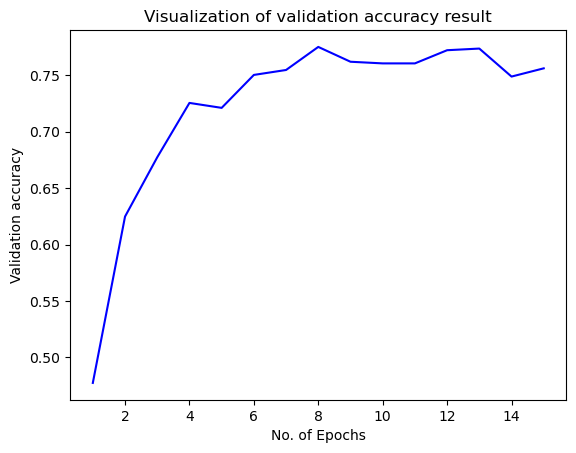

In [77]:
# This is validation accuracy visualization of our model after doing correction in model

plt.plot(epoch,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation accuracy')
plt.title('Visualization of validation accuracy result')
plt.show()

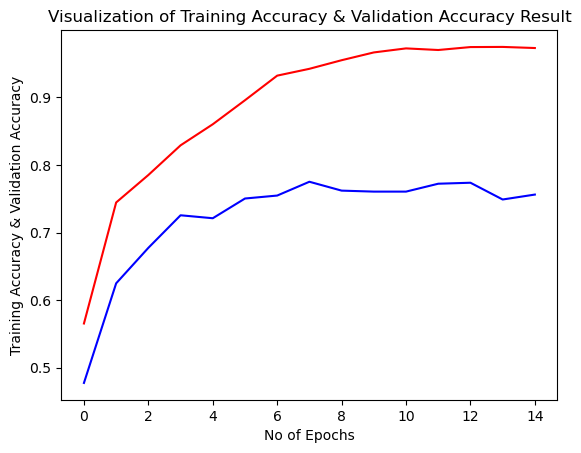

In [78]:
# Visualization of Training accuracy & Validation accuracy Result after doing correction in model accuracy

epochs=[i for i in range (1,33)]
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.show()

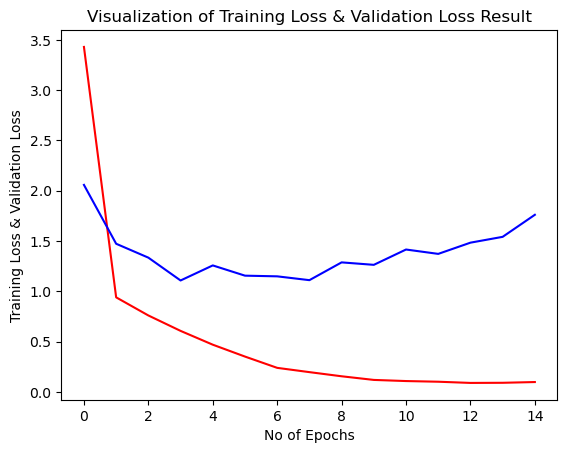

In [79]:
# Visualization of Training loss & Validation loss Result after doing correction in model accuracy

plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.show()

# Evaluating CNN Model

In [80]:
Training_loss,Training_accuracy=cnn.evaluate(training_set)

144/144 ━━━━━━━━━━━━━━━━━━━━ 35s 245ms/step - accuracy: 0.9944 - loss: 0.0254


In [81]:
Val_loss,Val_accuracy=cnn.evaluate(validation_set)

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - accuracy: 0.7726 - loss: 1.7710


# Loading Model

In [82]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/yashe/OneDrive/Desktop/dataset/test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False
)

Found 719 files belonging to 36 classes.


In [83]:
Test_loss,Test_accuracy=cnn.evaluate(test_set)

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.7602 - loss: 1.5855


In [84]:
cnn = tf.keras.models.load_model('trained_model.h5')

## Visualization and Performing prediction on single image 

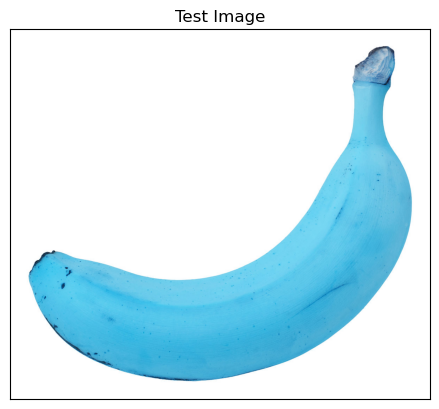

In [114]:
import cv2
image_path = "D:/veg/test/banana/Image_3.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [115]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Comverting single image into batch  because our model build in 2d array
prediction = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [116]:
print(prediction)
print(max(prediction[0]))

[[1.7286725e-02 6.1564553e-01 2.5111844e-03 2.7140461e-02 3.1629393e-03
  5.0227591e-03 1.5525158e-03 3.3594531e-03 3.8264594e-03 3.1644944e-02
  8.3017787e-03 2.6498740e-03 1.7347533e-02 4.8955870e-03 9.5632207e-04
  7.9503056e-04 4.5586103e-03 1.2163986e-02 6.8260048e-04 2.1628955e-02
  4.4860318e-03 4.5617963e-03 6.2695518e-03 1.2444160e-01 5.4213934e-04
  1.1419704e-02 1.5956506e-02 9.0152957e-03 8.7188119e-03 1.6043970e-03
  9.5345260e-04 1.1725335e-02 3.5064095e-03 1.5931006e-03 8.1666633e-03
  1.9059334e-03]]
0.6156455


In [110]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [117]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index[0][0])

1


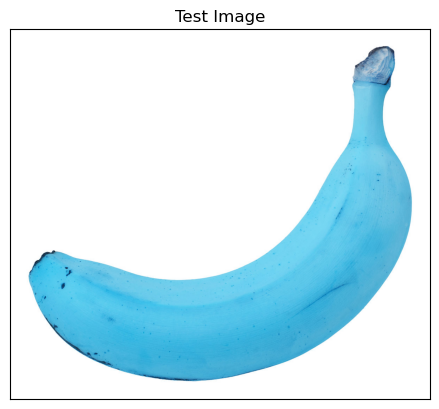

In [118]:
# Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [119]:
# Single prediction 
print('It is a {}'.format(test_set.class_names[result_index[0][0]]))

It is a banana


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


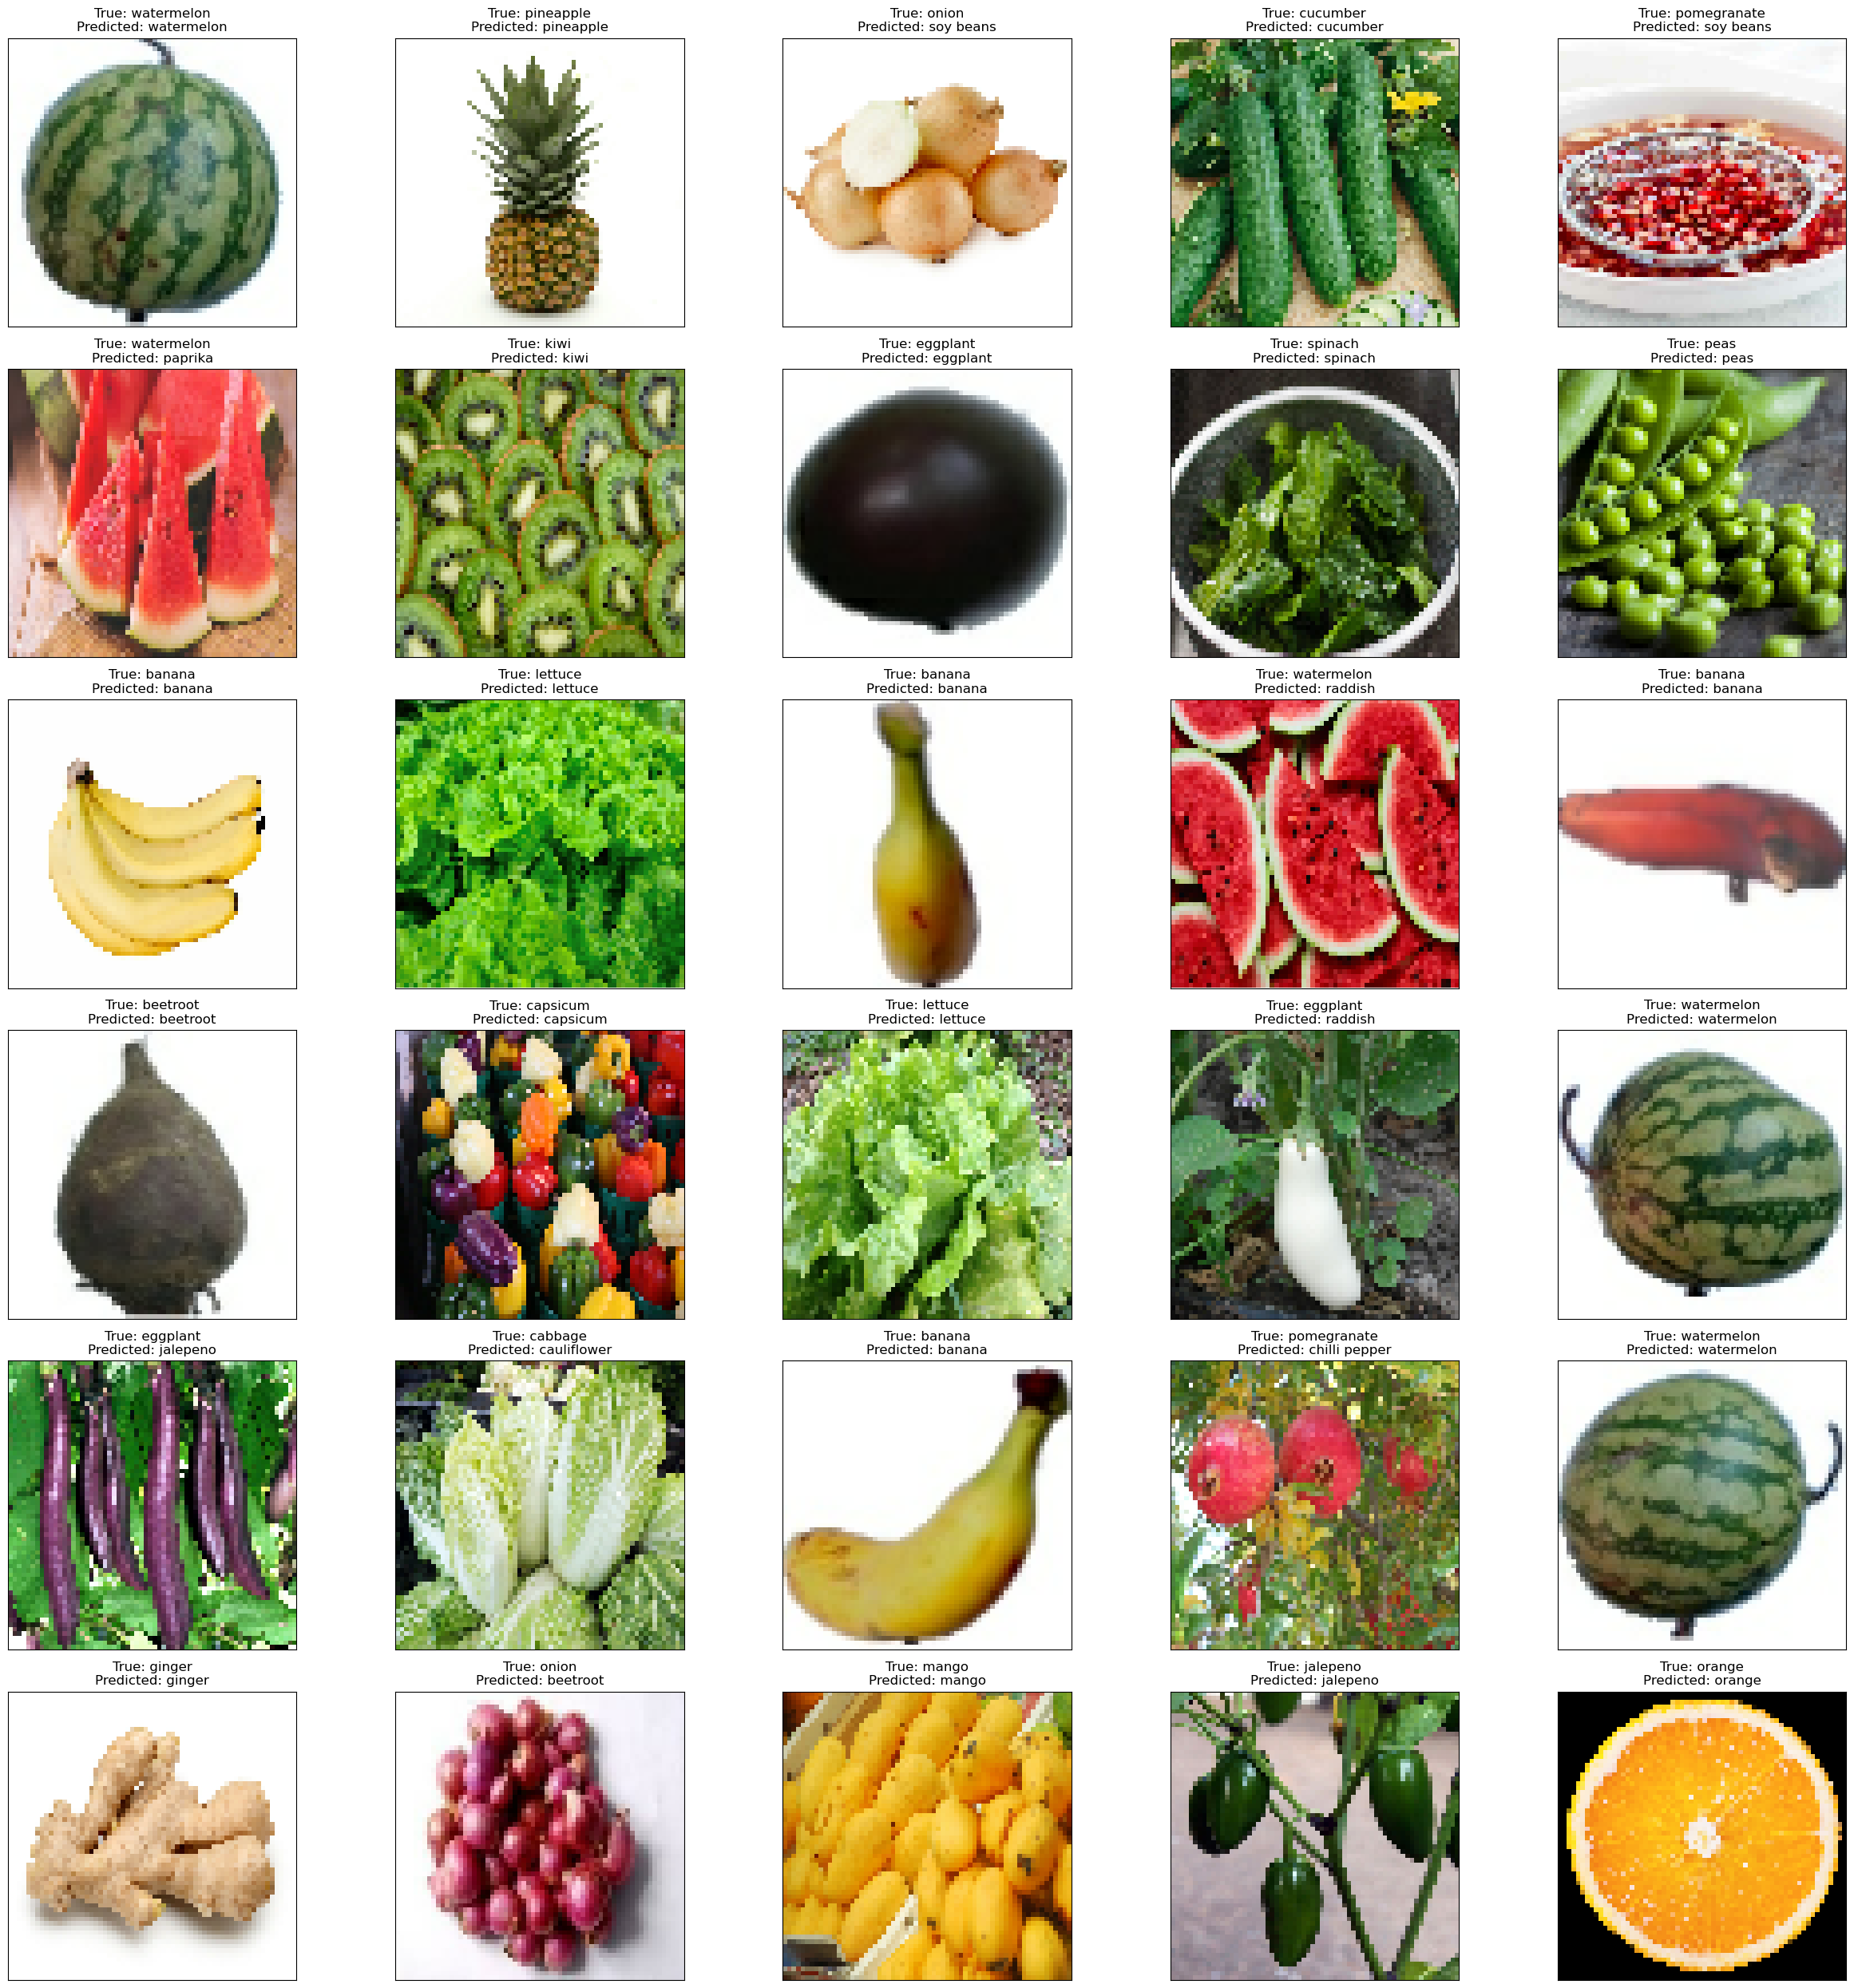

In [92]:
import matplotlib.pyplot as plt

# Assuming you have your CNN model (cnn) and test dataset (test_set)
# The 'pred' variable is already defined with the predicted labels

# Retrieve a few test samples and their corresponding true labels
num_samples_to_display = 36
sample_images, sample_labels = next(iter(test_set.take(num_samples_to_display)))

# Get the corresponding class names from the test_set
class_names = test_set.class_names

# Make predictions on the sampled images
sample_predictions = cnn.predict(sample_images)
sample_predictions = np.argmax(sample_predictions, axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25, 25),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].numpy().astype(np.uint8))
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[sample_predictions[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()